In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

from functions import *

## Feature Engineering

In [2]:
freedom_2017.head()

,year,hf_score,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
0,2017.0,7.84,5.3,9.3,10.0,9.2,10.0,8.6,5.8,7.5,5.1,9.6,8.3,7.7
1,2017.0,4.99,3.8,7.8,5.8,4.9,5.0,7.3,0.0,3.6,4.7,7.3,2.8,2.6
2,2017.0,5.40,3.4,8.1,6.7,8.8,4.0,6.5,5.0,6.8,3.0,5.6,3.2,3.7
3,2017.0,6.86,5.7,8.8,10.0,7.8,7.5,8.7,10.0,5.7,4.0,6.5,6.5,4.9
4,2017.0,7.42,4.9,9.1,8.3,6.2,6.5,7.2,8.2,7.4,5.9,9.5,8.2,7.4


### Creating the Outcome and Inputs

In [3]:
y = freedom_2017["hf_score"]  # Target. Variable that we want to predict(Dependent Variable)
X = freedom_2017.drop(columns=["hf_score"])  # Features. Predictor variables

### Creating Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)

In [5]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(108, 13)

(28, 13)

(108,)

(28,)

# Getting rid of missing values

In [6]:
X_train.dtypes

year                   float64
pf_rol                 float64
pf_ss                  float64
pf_movement            float64
pf_religion            float64
pf_association         float64
pf_expression          float64
pf_identity            float64
ef_government          float64
ef_legal               float64
ef_money               float64
ef_trade               float64
ef_trade_regulatory    float64
dtype: object

## Assumptions

Assumption 1:
The Dependent variable and Independent variable must have a linear relationship.

Assumption 2:
No Autocorrelation in residuals.

Assumption 3:
No Heteroskedasticity.

Assumption 4:
No Perfect Multicollinearity

Assumption 5:
Residuals must be normally distributed.

In [8]:
# Dropping features
def drop_feature(df, features):
    return df.drop(columns=features)

X_train = drop_feature(X_train, ["year"])

Mean: 6.980833333333334
Standard Deviation: 1.131897856261485


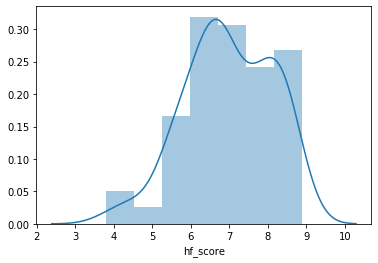

In [9]:
sns.distplot(y_train)
print("Mean:", y_train.mean())
print("Standard Deviation:", y_train.std())

## Assumption 1
The Dependent variable and Independent variable must have a linear relationship.

Able to check by doing a pair plot to look at the distributions

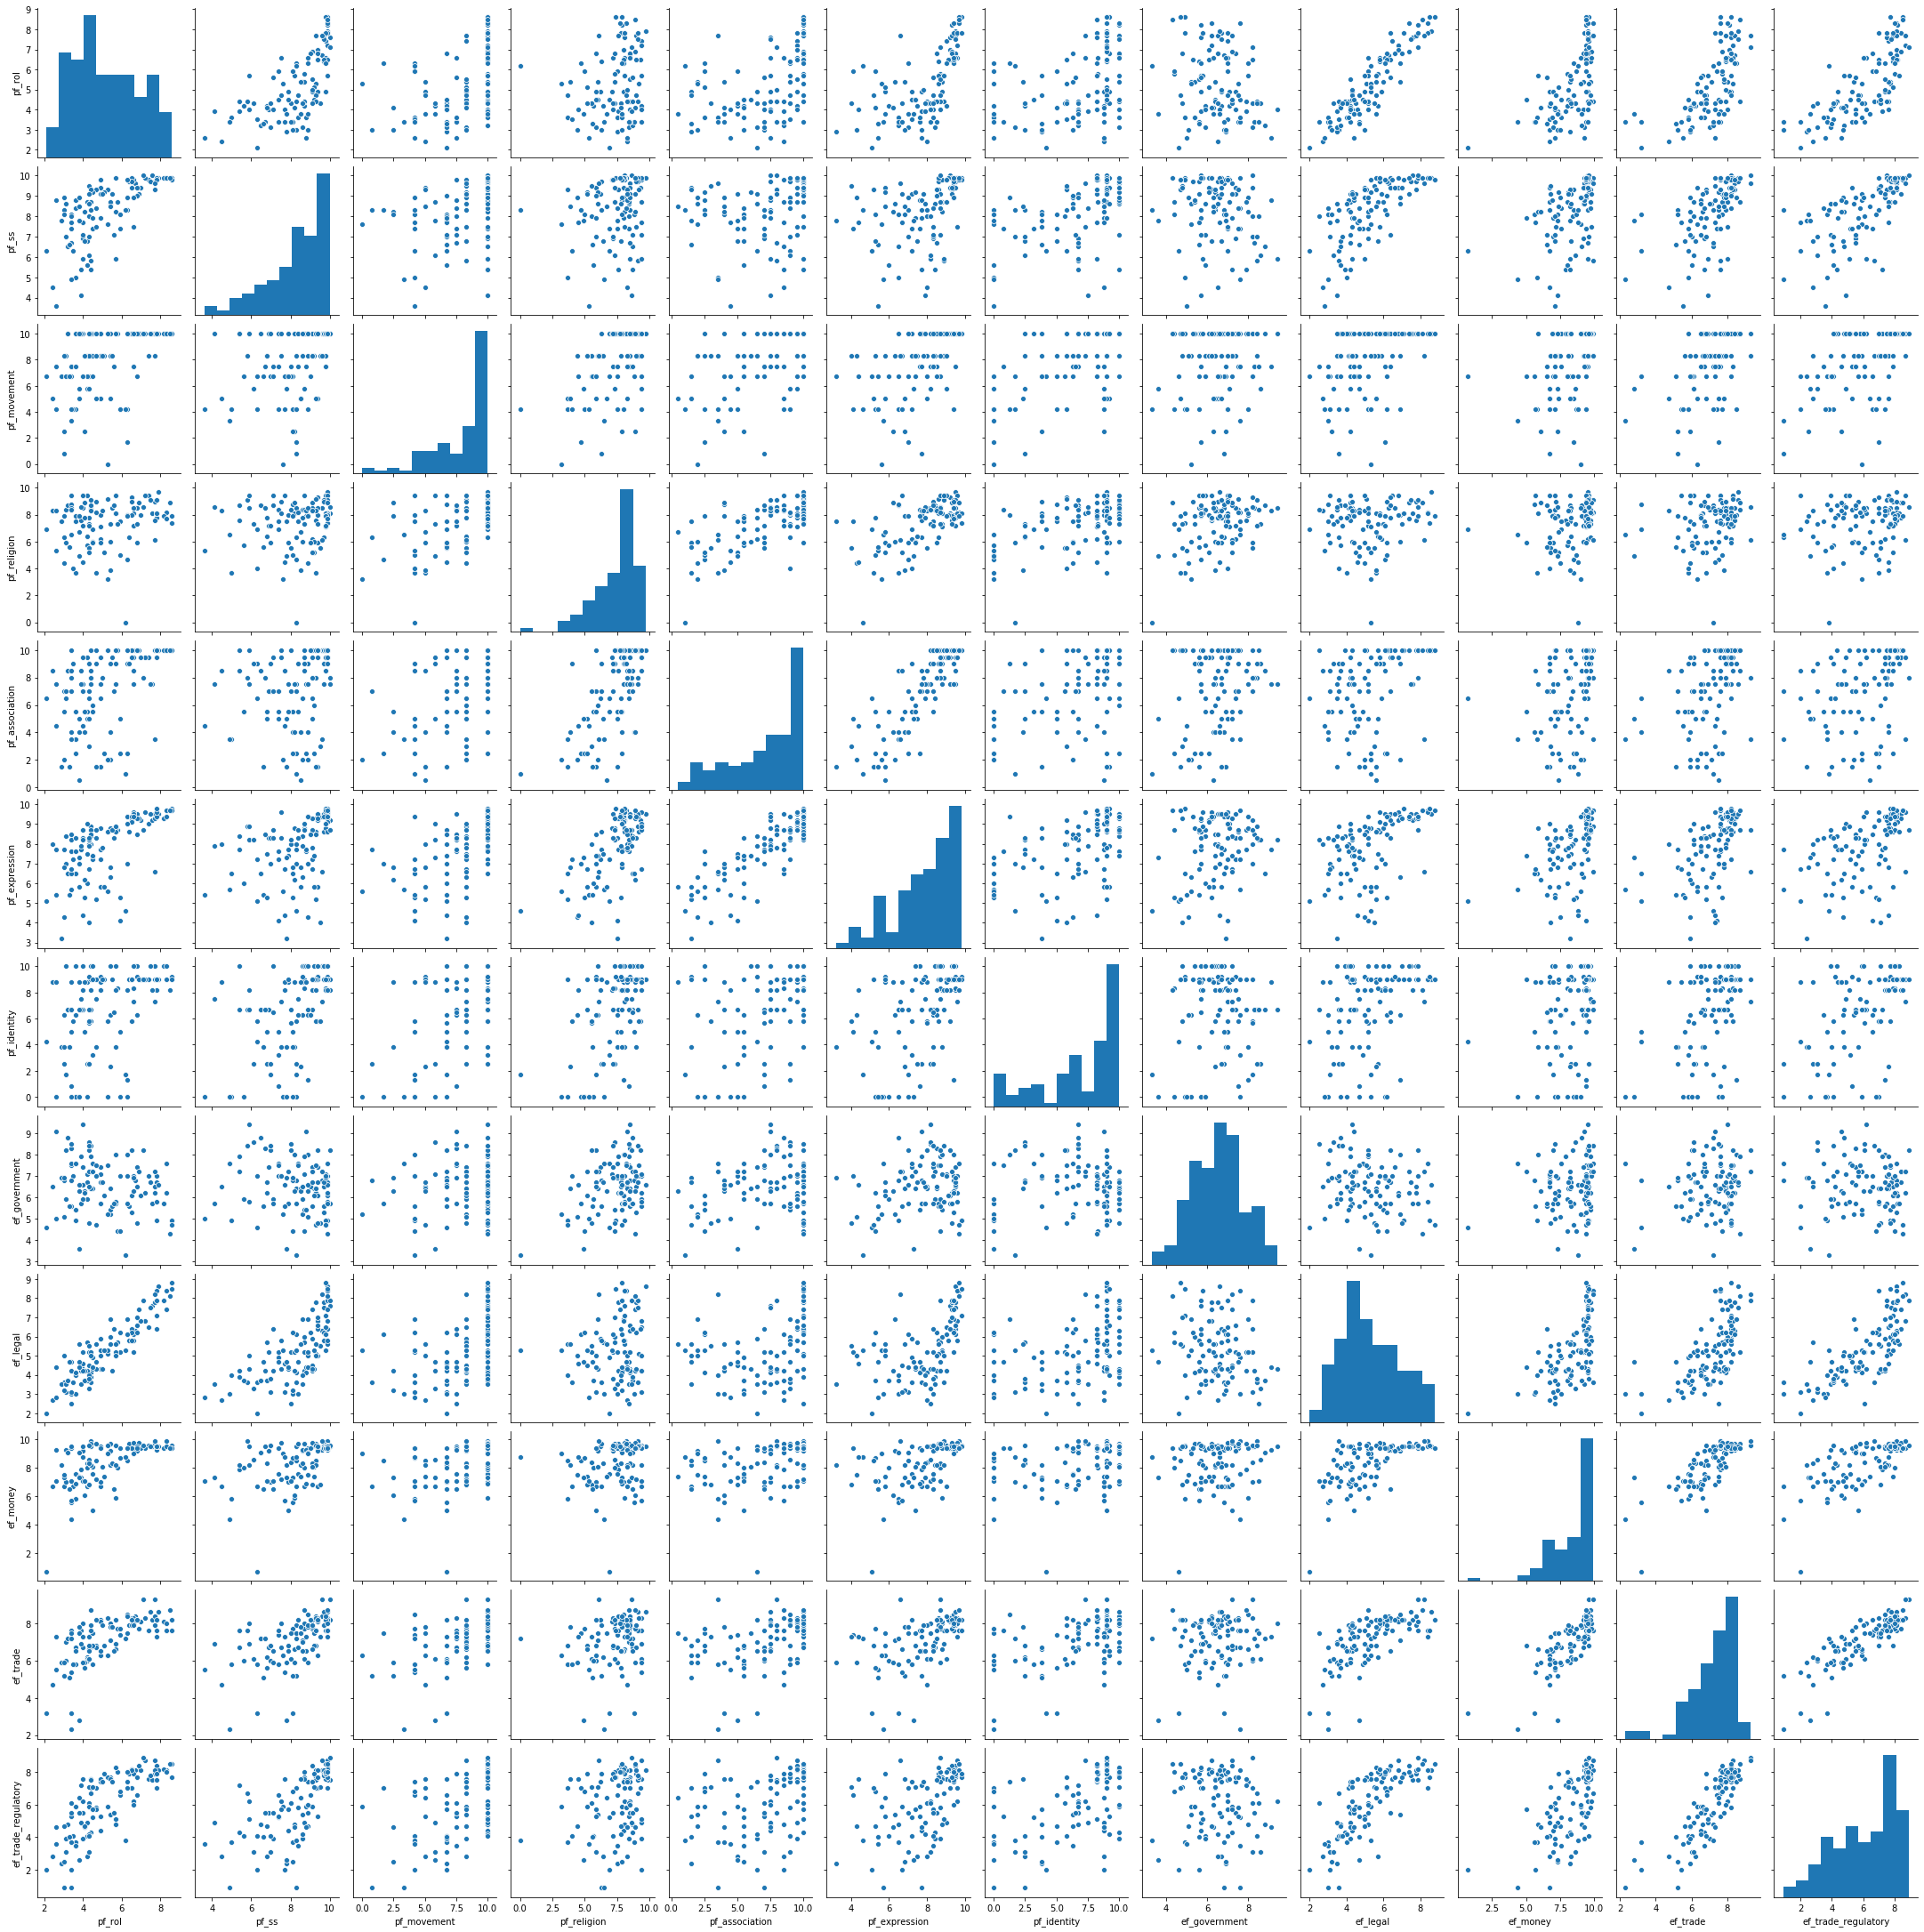

In [10]:
sns.pairplot(X_train)

**Observation**

The graph above mostly shows random points and some with a linear distribution

In [17]:
# Function that Normalizes data
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

X_train_norm = normalize(X_train)

In [18]:
X_train_norm.head()

,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
4,0.430769,0.859375,0.83,0.639175,0.631579,0.606061,0.82,0.672131,0.573529,0.956522,0.842857,0.8125
103,0.138462,0.734375,0.08,0.649485,0.684211,0.681818,0.25,0.573770,0.235294,0.652174,0.414286,0.0000
144,0.323077,0.500000,0.83,0.659794,0.473684,0.651515,0.25,0.557377,0.544118,0.826087,0.557143,0.2375
29,0.046154,0.140625,0.50,0.855670,0.842105,0.727273,0.88,0.524590,0.102941,0.652174,0.342857,0.2375
40,0.876923,0.984375,1.00,0.804124,0.947368,0.954545,0.82,0.557377,0.647059,0.934783,0.842857,0.9375


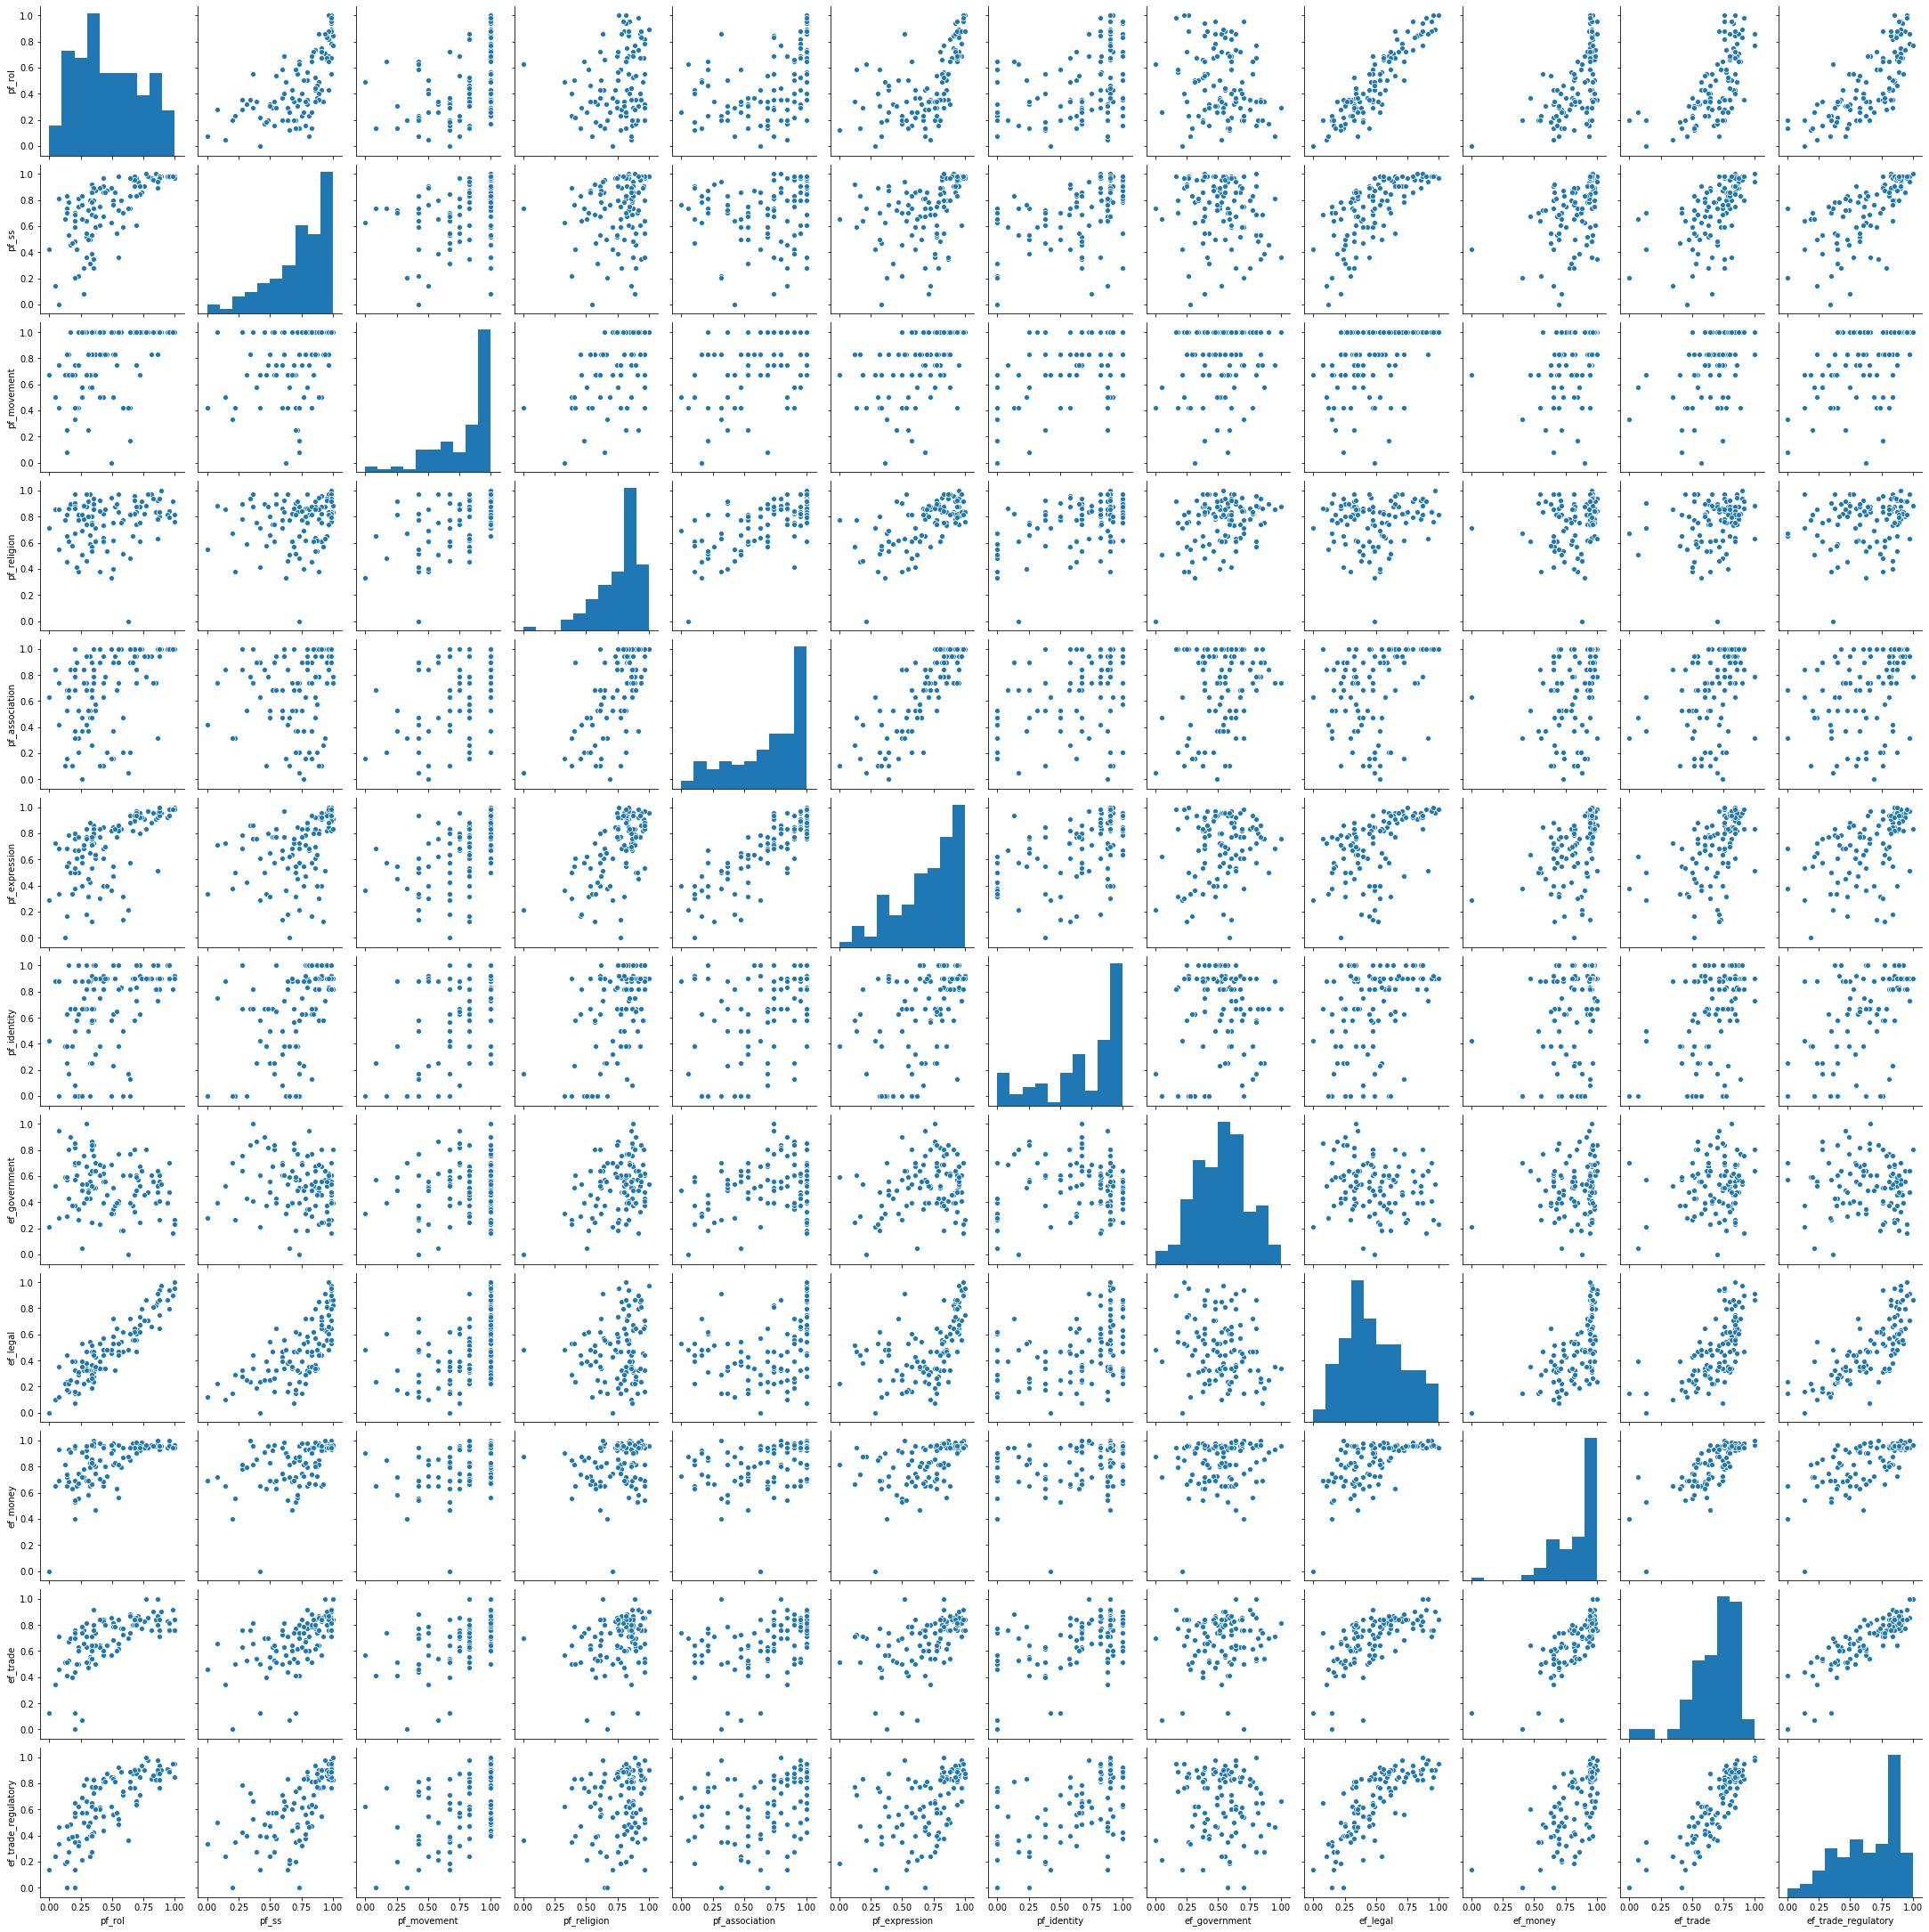

In [19]:
sns.pairplot(X_train_norm)

**Observation**

Some of the data looks categorical

In [21]:
# Log transformation on X_train
X_train_log = np.log1p(X_train)

X_train_log.head()

,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
4,1.774952,2.312535,2.230014,1.974081,2.014903,2.104134,2.219203,2.128232,1.931521,2.351375,2.219203,2.128232
103,1.386294,2.230014,0.587787,1.987874,2.079442,2.163323,1.252763,2.054124,1.526056,2.041220,1.824549,0.641854
144,1.648659,2.054124,2.230014,2.001480,1.791759,2.140066,1.252763,2.041220,1.902108,2.230014,1.974081,1.335001
29,1.223775,1.704748,1.791759,2.230014,2.251292,2.197225,2.282382,2.014903,1.308333,2.041220,1.740466,1.335001
40,2.174752,2.388763,2.397895,2.174752,2.351375,2.351375,2.219203,2.041220,2.001480,2.332144,2.219203,2.240710


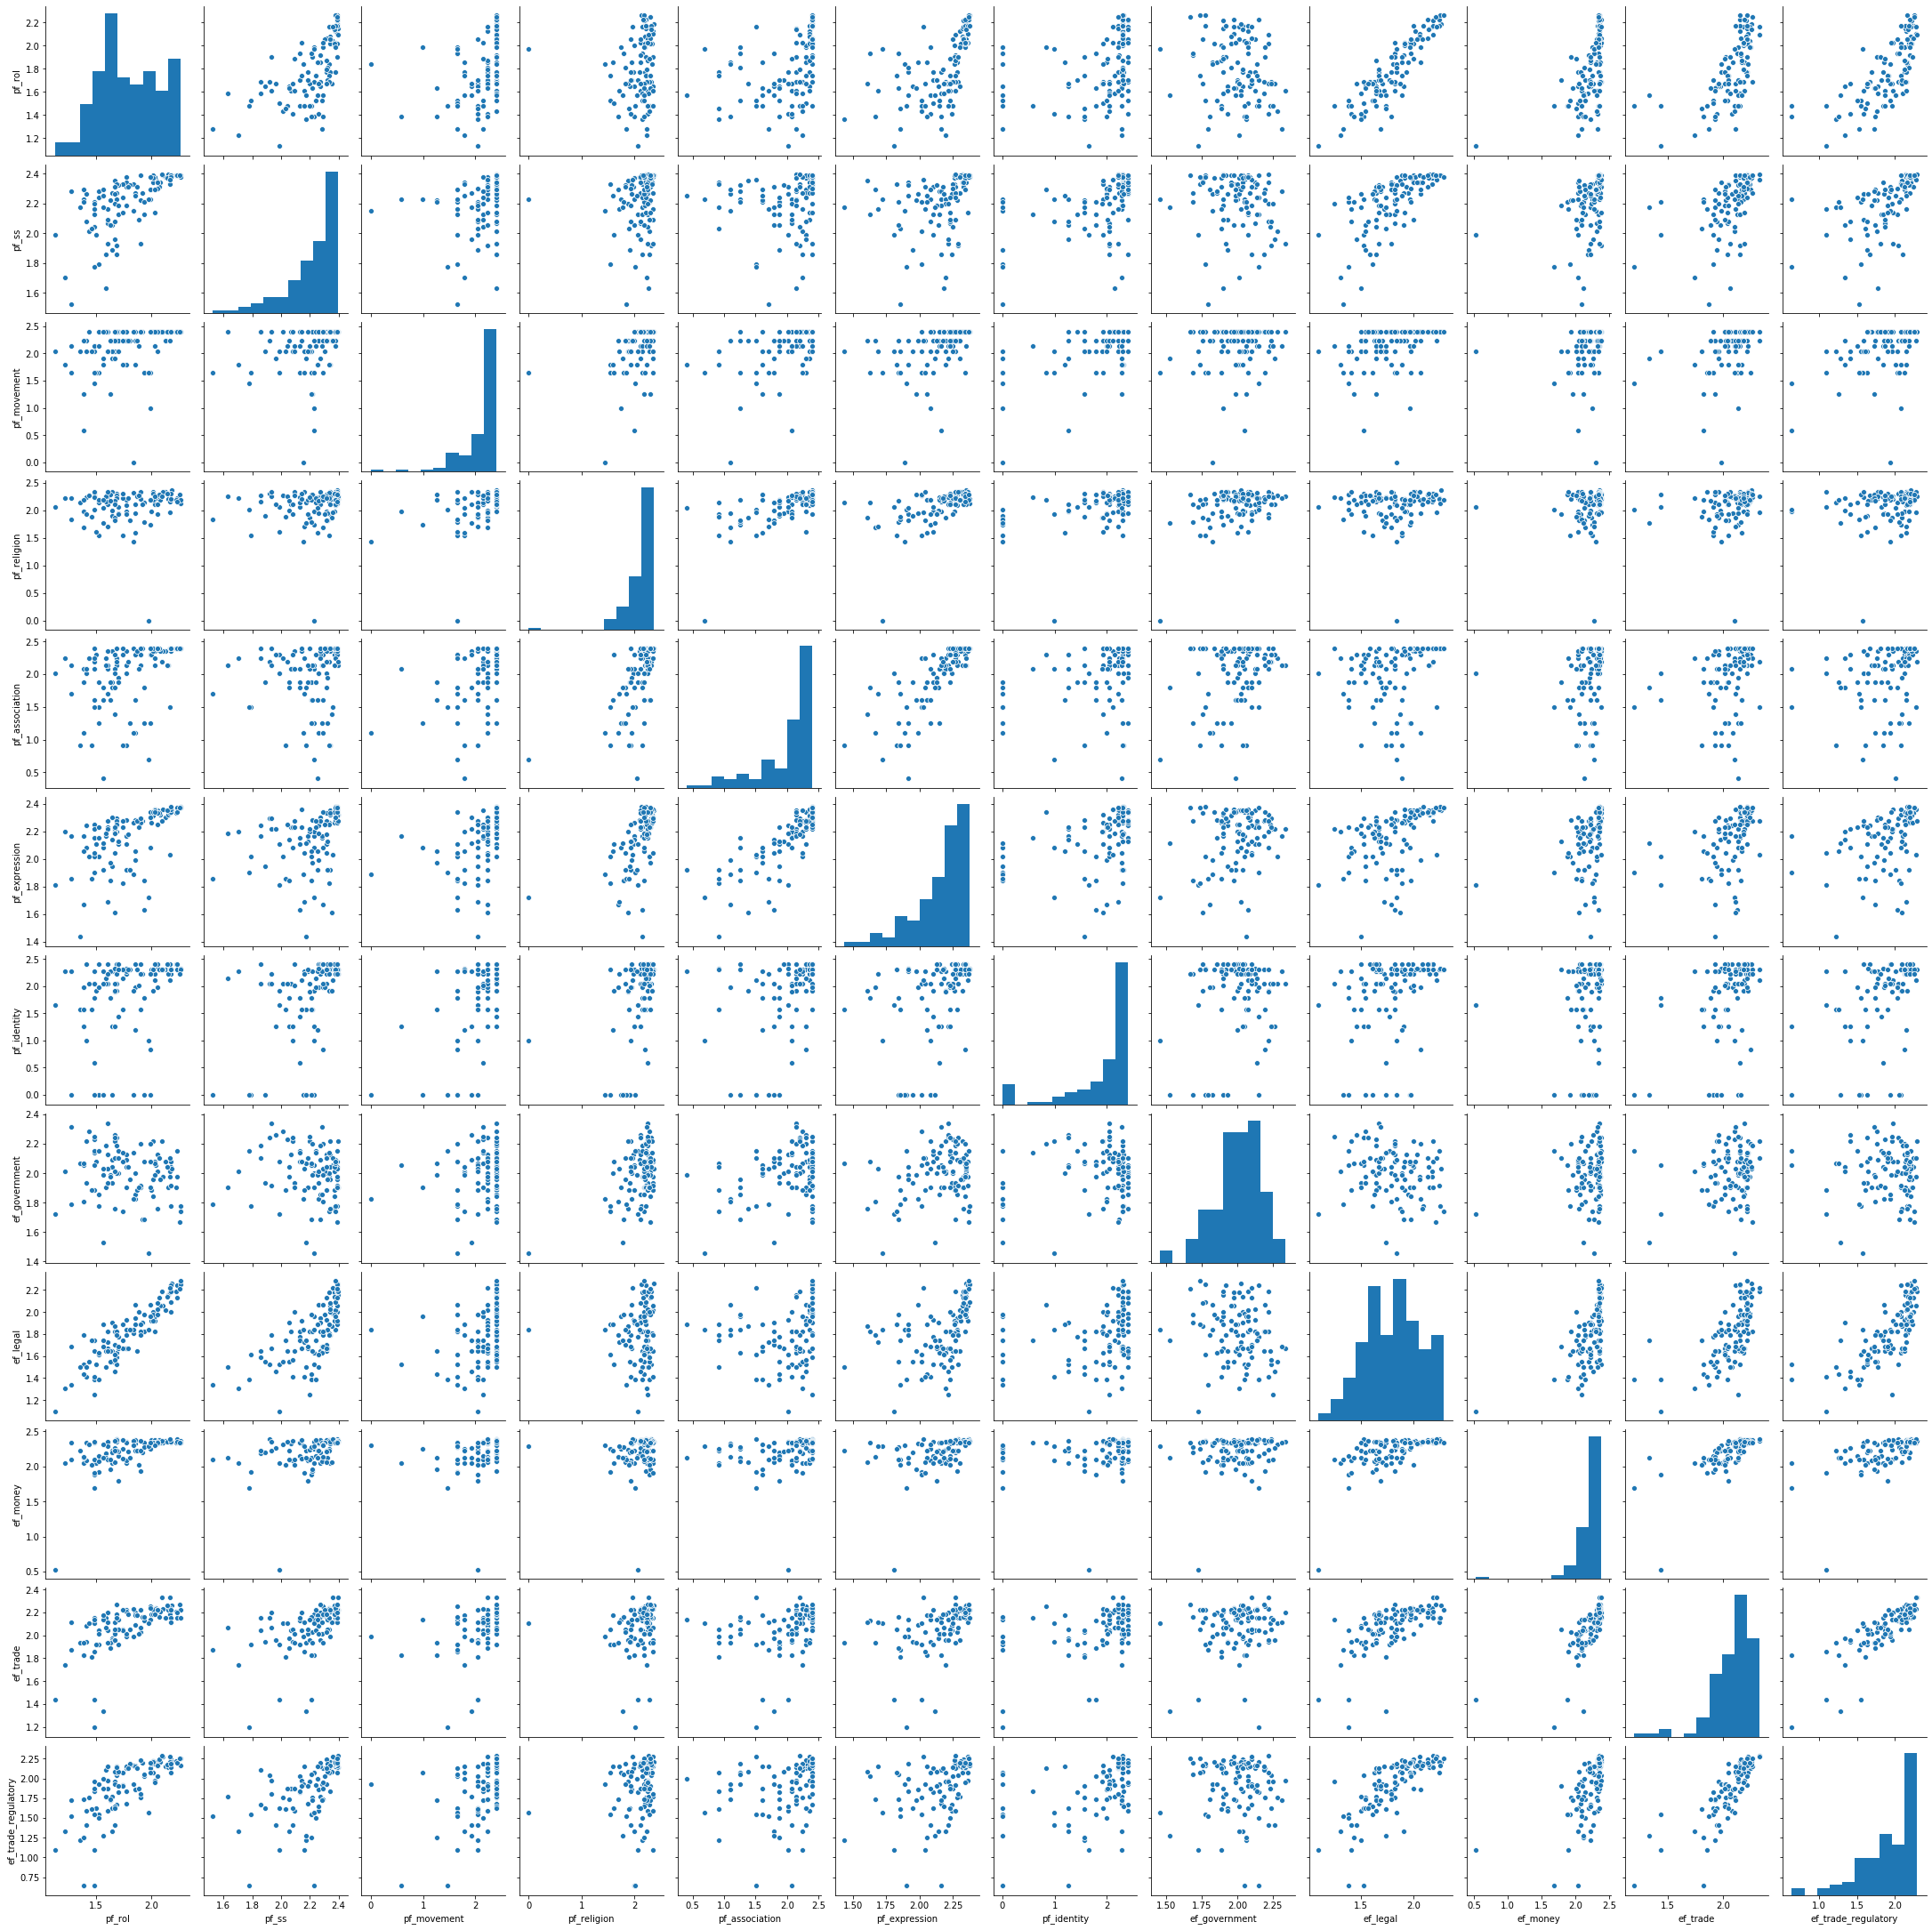

In [22]:
sns.pairplot(X_train_log)

**Observation**

Data looks right skewed

## Conclusion
The training set is the best set to use. The data already seems normaalized with some linear distribution

## Assumtion 2 and Assumption 4
No Autocorrelation in residuals.

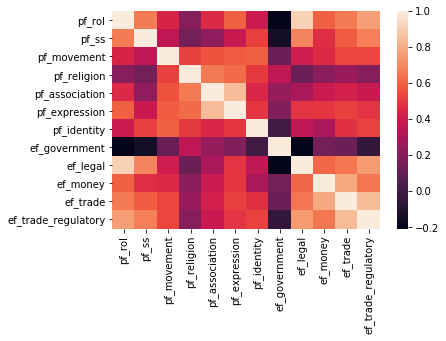

In [29]:
# calculate the correlation matrix
corr = X_train.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

### Conclusion
There is no multicollinearity

## Assumption 3

No Heteroskedasticity. Refers to the circumstance in which the variability of a variable(lack of consistency/lack of a fixed pattern) is unequal across the range of values of a second variable that predicts it

Looking for Homoscedasticity

We could do a non linear transformation of the dependent variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

In [47]:
# Instantiating the linear model
lr = LinearRegression()

lr.fit(X_train, y_train)  # Studing and learning from the training sets
y_predict = lr.predict(X_train)
lr.score(X_train, y_train)

0.9973790627726379

In [54]:
# Doing the sqrt of the dependent variable
y_train_sqrt = np.sqrt(y_train)

lr.fit(X_train, y_train_sqrt)  # Studing and learning from the training sets
y_predict = lr.predict(X_train)
lr.score(X_train, y_train_sqrt)

0.9943740449596151

'\nThis plot also shows \na Q-Plot(Quantile-Quantile)\n'

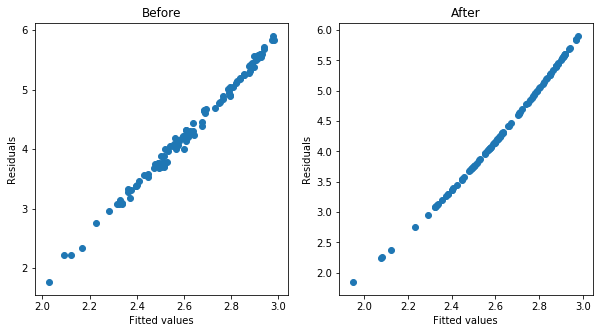

In [71]:
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Before")
plt.scatter(y_predict, (y_train - y_predict))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
 
plt.subplot(1, 2, 2)
plt.title("After")
plt.scatter(y_train_sqrt, (y_train-y_train_sqrt))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

"""
This plot also shows 
a Q-Plot(Quantile-Quantile)
"""

### Conclusion
The graph on the left shows a linear relationship and needs not to be changed

## Assumption 5:

Residuals must be normally distributed.

Text(0.5, 0, 'Residuals')

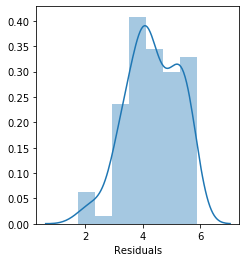

In [70]:
# Plotting the residuals

plt.subplots(figsize=(8, 4))  # Figure size

# Graphing
plt.subplot(1, 2, 1)
sns.distplot(y_train - y_predict);
plt.xlabel('Residuals')

### Conclusion

The residuals are somewhat normally distributed

### Linear Regression

In [10]:
# Instantiating the linear model
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)  # Studing and learning from the training sets
y_predict = lr.predict(X_train)
lr.score(X_train, y_train)

0.9973790627726379

In [17]:
sm.add_constant(X_train)

ols = sm.OLS(y_train, X_train, hasconst=True)

result = ols.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2781.
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          5.34e-115
Time:                        09:03:00   Log-Likelihood:                 145.30
No. Observations:                 108   AIC:                            -266.6
Df Residuals:                      96   BIC:                            -234.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
pf_rol                  0.1465      0.011     12.883      0.000       0.124       0.169
pf_ss                   0.1369      0.006     22.238      0.000       0.125       0.149
pf_movement             0.0493      0.004     12.617      0.000       0.042       0.057
pf_religion             0.0514      0.006      8.667      0.000       0.040       0.063
pf_association          0.0463      0.005      9.771      0.000       0.037       0.056
pf_expression           0.0439      0.009      4.907      0.000       0.026       0.062
pf_identity             0.0477      0.003     14.827      0.000       0.041       0.054
ef_government           0.1325      0.006     20.839      0.000       0.120       0.145
ef_legal                0.1227      0.011     10.804      0.000       0.100       0.145
ef_money                0.1142      0.008     15.057      0.000       0.099       0.129
ef_trade                0.1277      0.012     10.925      0.000       0.104       0.151
ef_trade_regulatory    -0.0114      0.008     -1.505      0.136      -0.026       0.004
==============================================================================
Omnibus:                        1.844   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.400
Skew:                          -0.045   Prob(JB):                        0.497
Kurtosis:                       2.450   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""